In [1]:
import pandas as pd
import numpy as np
import pickle
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

In [2]:
df = pd.read_csv('combined_with_split_tags.csv')
df

,Tag,Cleaned_Text,Length,Emoticons_count,Emoticons Avg,Unique_Words,TTR,anger,anticipation,disgust,...,interrogative,article,subordination,conjunction.1,preposition.1,count,E_I,N_S,F_T,J_P
0,ENFP,disagree think theory given validity rather be...,1682,0,0.000000,25,0.014863,0.002378,0.003567,0.000595,...,0,1,0,0,0,228,E,N,F,P
1,INTP,selfish generally perform task better person a...,1265,0,0.000000,26,0.020553,0.010277,0.006324,0.010277,...,0,0,0,0,0,177,I,N,T,P
2,INFP,personality system technically separate types...,738,0,0.000000,25,0.033875,0.001355,0.000000,0.004065,...,0,1,0,0,0,129,I,N,F,P
3,INTP,like functions general theyre basically ways p...,1550,0,0.000000,25,0.016129,0.002581,0.006452,0.002581,...,1,0,0,0,0,206,I,N,T,P
4,ENTP,even referring nihilism yeah point dying livin...,767,0,0.000000,25,0.032595,0.011734,0.007823,0.006519,...,0,0,0,0,0,110,E,N,T,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12821,ISTP,kinda amusing deal trust relate usually someon...,599,0,0.000000,24,0.040067,0.000000,0.005008,0.001669,...,0,0,0,0,0,88,I,S,T,P
12822,ESFP,social 9 description fit better probably descr...,617,23,0.037277,25,0.040519,0.000000,0.003241,0.003241,...,0,0,0,0,0,89,E,S,F,P
12823,ISFP,believe blood type influence someone personali...,260,0,0.000000,26,0.100000,0.000000,0.003846,0.000000,...,0,0,0,0,0,34,I,S,F,P
12824,INFJ,benevolent creator linkpractical 26 conceptual...,645,2,0.003101,25,0.038760,0.001550,0.007752,0.001550,...,0,0,0,0,0,95,I,N,F,J


In [3]:
df['JP'] = df['Tag'].apply(lambda x: 1 if 'J' in x else 0)
df['JP']

0        0
1        0
2        0
3        0
4        0
        ..
12821    0
12822    0
12823    0
12824    1
12825    0
Name: JP, Length: 12826, dtype: int64

In [4]:
grid_search = pickle.load(open('model_jp.sav', 'rb'))

C:\Users\School\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.22.2.post1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
C:\Users\School\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.22.2.post1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
C:\Users\School\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator GridSearchCV from version 0.22.2.post1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [5]:
JP_allfeatures = df.drop(columns = ['Tag', 'JP','E_I',	'N_S',	'F_T',	'J_P'])
JP_y = df['JP']

X_train, X_test, y_train, y_test = train_test_split(JP_allfeatures, JP_y, test_size=0.2, random_state=1)
y_train = y_train.reset_index(drop = True)
y_test = y_test.reset_index(drop = True)

In [6]:
X_train_cleanedtext = X_train['Cleaned_Text']
X_train_features = X_train.drop(columns = ['Cleaned_Text'])
X_train_features = X_train_features.reset_index(drop = True)

X_test_cleanedtext = X_test['Cleaned_Text']
X_test_features = X_test.drop(columns = ['Cleaned_Text'])
X_test_features = X_test_features.reset_index(drop = True)

In [7]:
# Word Representation

vect = CountVectorizer(max_features = 5000)
X_train_dtm = vect.fit_transform(X_train_cleanedtext)
X_test_dtm = vect.transform(X_test_cleanedtext)

In [8]:
X_train_dtm_df = pd.DataFrame(X_train_dtm.toarray(), columns = vect.get_feature_names())
X_test_dtm_df = pd.DataFrame(X_test_dtm.toarray(), columns = vect.get_feature_names())

X_train_allfeatures = pd.concat([X_train_dtm_df, X_train_features], axis=1)
X_test_allfeatures = pd.concat([X_test_dtm_df, X_test_features], axis=1)

In [9]:
# Predicting on the transformed data
grid_predictions = grid_search.predict(X_test_allfeatures)

# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, grid_predictions )

0.6095089633671084

In [10]:
grid_search.best_params_

{'bootstrap': True,
 'class_weight': 'balanced_subsample',
 'max_depth': 80,
 'min_samples_leaf': 4,
 'min_samples_split': 12,
 'n_estimators': 200}

In [11]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(bootstrap = True, class_weight = 'balanced',
                                   max_depth= 80,min_samples_leaf =3, min_samples_split= 8,n_estimators =300)
                                   
forestOpt = forest.fit(X_train_allfeatures,y_train)
y_pred = forestOpt.predict(X_test_allfeatures)

In [12]:
# Predicting on the transformed data
forest_predictions = forestOpt.predict(X_test_allfeatures)

# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test,forest_predictions )

0.6157443491816056

In [13]:
scores = forestOpt.feature_importances_
indices = np.argsort(forestOpt.feature_importances_)[::-1]
top20_indices = indices[0:20]

print("Feature ranking:")

top20_features = []
top20_score = []

for i in top20_indices:   
    print(X_train_allfeatures.columns[i], scores[i])
    top20_features.append(X_train_allfeatures.columns[i])
    top20_score.append(scores[i])


Feature ranking:
negative 0.00612641065228528
trust 0.0060843142888627666
joy 0.005973089990560051
fear 0.005775077013719315
disgust 0.005770800788268265
ni 0.005738382716622201
Polarity 0.005691987371087507
positive 0.005654875021957582
sadness 0.005504998076192801
anticipation 0.005416452164217889
anger 0.005341000710691425
surprise 0.0052714975748633045
Afinn Score 0.005247643920330724
Subjectivity 0.005187836563506716
count 0.005094213440457332
Length 0.005088538632795585
TTR 0.005049529196181484
Emoticons Avg 0.004070575689782874
really 0.003622909434528346
like 0.0032834101698723007


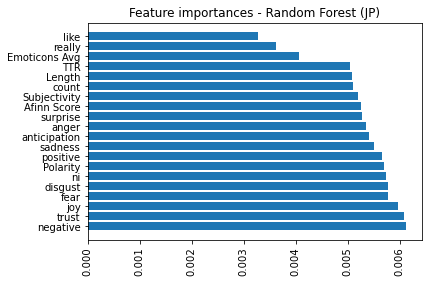

In [15]:
import matplotlib.pyplot as plt
plt.figure()
plt.title("Feature importances - Random Forest (JP)")
plt.barh(top20_features, top20_score, height=0.8, align='center')
plt.xticks(rotation='vertical')
plt.show()